# SciKit Learn linear and polynomial regression

# Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Read data

In [40]:
# dataset part 1
dataset = pd.read_csv('../dataset/smog_part1.csv', index_col = 0)

In [41]:
dataset = dataset[['pm25_x', 'pm25_y', 'temperatureSht', 'humiditySht', 'pressure']]
dataset = dataset[dataset['humiditySht'] >= 60]

dataset.head()

,pm25_x,pm25_y,temperatureSht,humiditySht,pressure
0,19.0,13.8,6.1,72,986
1,16.7,14.4,5.9,74,986
2,21.8,15.1,5.7,75,986
3,21.8,18.0,5.7,76,986
4,25.0,19.0,5.5,77,986


# Train and test split

Split data for train and test sets and normalze

In [42]:
Y = dataset['pm25_x'].to_numpy().reshape(-1, 1)
X = dataset.drop('pm25_x', axis = 1).to_numpy()

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 0)

In [44]:
scaler = preprocessing.StandardScaler().fit(x_train)
y_scaler = max(y_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

y_train = y_train / y_scaler

# SKLearn linear regression

In [8]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = regr.predict(x_test) * y_scaler

r2 = r2_score(y_test, y_pred) * 100
print('R^2: ', r2)
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

R^2:  83.39602238959675
Mean squared error:  8.695514432312358
Mean absolute error:  1.5218091753736454


In [10]:
regr.coef_

array([[ 0.07080732, -0.0130708 , -0.01364244, -0.00335226]])

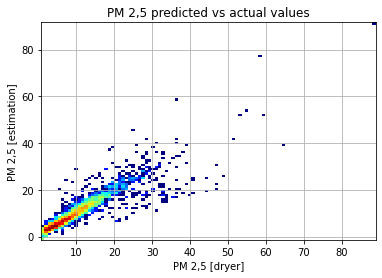

In [11]:
plt.hist2d(y_test[:, 0], y_pred[:, 0], bins= 100, cmap = 'jet', norm = matplotlib.colors.LogNorm())
plt.xlabel('PM 2,5 [dryer]')
plt.ylabel('PM 2,5 [estimation]')
plt.title('PM 2,5 predicted vs actual values')
plt.grid(True)
plt.show()

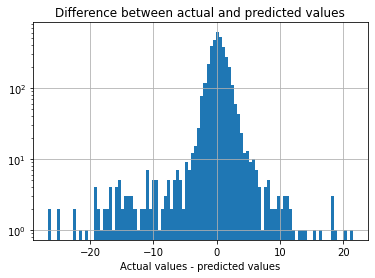

In [12]:
plt.hist(y_pred - y_test, density = False, bins = 100)

plt.yscale('log')
plt.xlabel('Actual values - predicted values')
plt.title('Difference between actual and predicted values')
plt.grid(True)
plt.show()

# SKLearn polynomial

In [51]:
def polynomial_regressor(degree, x_train, y_train):
    poly_model = PolynomialFeatures(degree = degree)

    # transform out polynomial features
    poly_x_values = poly_model.fit_transform(x_train)

    # should be in the form [1, a, b, a^2, ab, b^2]
    print(f'Initial values {x_train[0]}\nMapped to {poly_x_values[0]}')

    # fit the model
    poly_model.fit(poly_x_values, y_train)

    # linear regression as a base
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_train)

    print('Coefficients: ', regression_model.coef_)
    return regression_model, poly_model

### Second-degree polynomial

In [63]:
second_degree_model, poly_model = polynomial_regressor(2, x_train, y_train)

y_pred = second_degree_model.predict(poly_model.fit_transform(x_test)) * y_scaler

Initial values [-0.49581821  0.67946533 -0.13956174  0.82594732]
Mapped to [ 1.         -0.49581821  0.67946533 -0.13956174  0.82594732  0.24583569
 -0.33689128  0.06919725 -0.40951972  0.46167314 -0.09482737  0.56120257
  0.01947748 -0.11527065  0.68218897]
Coefficients:  [[ 0.00000000e+00  6.92828495e-02 -1.00649888e-02 -1.18281780e-02
  -4.78550615e-04 -1.12003940e-03 -7.56426745e-03 -6.20948524e-03
  -3.56424345e-04  1.07298955e-02  4.50837120e-03  4.35638003e-03
  -4.05625506e-03  1.74757619e-03  3.71605146e-05]]


In [64]:
print('R^2: ', r2_score(y_test, y_pred) * 100)
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

R^2:  87.64744901509196
Mean squared error:  6.469039400405057
Mean absolute error:  1.3764902957500722


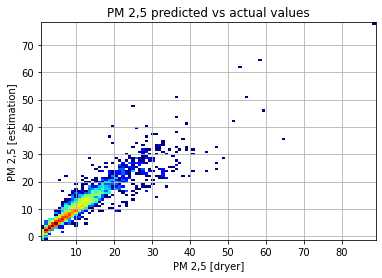

In [65]:
plt.hist2d(y_test[:, 0], y_pred[:, 0], bins= 100, cmap = 'jet', norm = matplotlib.colors.LogNorm())
plt.xlabel('PM 2,5 [dryer]')
plt.ylabel('PM 2,5 [estimation]')
plt.title('PM 2,5 predicted vs actual values')
plt.grid(True)
plt.show()

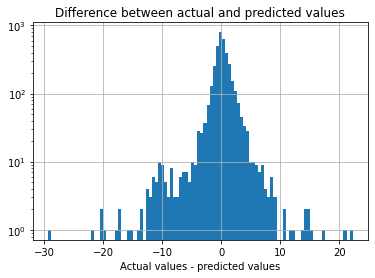

In [66]:
plt.hist(y_pred - y_test, density = False, bins = 100)

plt.yscale('log')
plt.xlabel('Actual values - predicted values')
plt.title('Difference between actual and predicted values')
plt.grid(True)
plt.show()

### third-degree polynomial

In [67]:
third_degree_model, poly_model = polynomial_regressor(3, x_train, y_train)

y_pred = third_degree_model.predict(poly_model.fit_transform(x_test)) * y_scaler

Initial values [-0.49581821  0.67946533 -0.13956174  0.82594732]
Mapped to [ 1.         -0.49581821  0.67946533 -0.13956174  0.82594732  0.24583569
 -0.33689128  0.06919725 -0.40951972  0.46167314 -0.09482737  0.56120257
  0.01947748 -0.11527065  0.68218897 -0.12188981  0.16703683 -0.03430926
  0.20304733 -0.22890595  0.04701714 -0.27825445 -0.00965729  0.05715329
 -0.33824171  0.31369089 -0.06443191  0.38131769  0.01323427 -0.07832241
  0.46352376 -0.00271831  0.01608737 -0.09520748  0.56345215]
Coefficients:  [[-9.75576954e-19  7.02159867e-02  2.71803306e-03 -1.07533420e-02
   3.88630035e-04 -2.05888686e-03 -3.02036641e-03 -7.63930134e-03
   6.13734667e-04  6.57629406e-03 -4.54371560e-05 -3.20731090e-05
  -3.96989451e-03  4.50102216e-04 -4.45958649e-04  1.00852008e-04
  -1.29860740e-04  5.82896051e-04  9.32445149e-04  4.31180502e-03
   1.54767518e-03  3.90473281e-03 -1.45021572e-03  1.03357817e-03
  -1.96745447e-04 -6.30301061e-03 -1.49243249e-03 -2.80019908e-03
   1.26212255e-03 -2.

In [68]:
print('R^2: ', r2_score(y_test, y_pred) * 100)
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))

R^2:  89.53806363513841
Mean squared error:  5.478923230635342
Mean absolute error:  1.1584270168314832


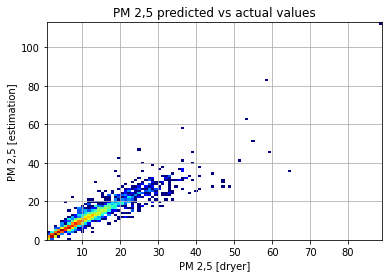

In [69]:
plt.hist2d(y_test[:, 0], y_pred[:, 0], bins= 100, cmap = 'jet', norm = matplotlib.colors.LogNorm())
plt.xlabel('PM 2,5 [dryer]')
plt.ylabel('PM 2,5 [estimation]')
plt.title('PM 2,5 predicted vs actual values')
plt.grid(True)
plt.show()

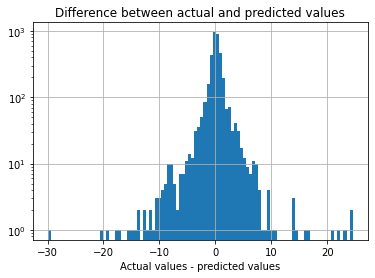

In [70]:
plt.hist(y_pred - y_test, density = False, bins = 100)

plt.yscale('log')
plt.xlabel('Actual values - predicted values')
plt.title('Difference between actual and predicted values')
plt.grid(True)
plt.show()